# AI Text Summarizer

### Import Requirements

In [70]:
# python3 -m venv venv
# source venv/bin/activate

In [71]:
%pip install rouge_score
%pip install evaluate
%pip install --upgrade -q wandb
%pip install --upgrade datasets
%pip install python-dotenv
# %pip install torch==2.4.1 torchvision==0.19.1 torchaudio==2.4.1 --index-url https://download.pytorch.org/whl/cpu
%pip install torch==2.4.1 torchvision==0.19.1 torchaudio==2.4.1 --index-url https://download.pytorch.org/whl/cu121
%pip install --upgrade transformers
%pip install --upgrade transformers[torch]
%pip install seaborn
%pip install torch-directml
%pip install pymupdf

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/home/dswamina/ai-text-summarizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/home/dswamina/ai-text-summarizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/home/dswamina/ai-text-summarizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/home/dswamina/ai-text-summarizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/home/dswamina/ai-text-summarizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://download.pytorch.org/whl/cu121
You should consider upgrading via the '/home/dswamina/ai-text-summarizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/home/dswamina/ai-text-summarizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/home/dswamina/ai-text-summarizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/home/dswamina/ai-text-summarizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/home/dswamina/ai-text-summarizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/home/dswamina/ai-text-summarizer/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline, set_seed
from transformers import DataCollatorForSeq2Seq
from transformers import Seq2SeqTrainer
from transformers import Seq2SeqTrainingArguments
from transformers import AutoTokenizer

import datasets
from datasets import Dataset
from datasets import DatasetDict

from evaluate import load

from tqdm import tqdm

import wandb
import huggingface_hub

import nltk
from nltk.tokenize import sent_tokenize
nltk.download("punkt_tab")

import warnings
warnings.filterwarnings('ignore')

import evaluate



[nltk_data] Downloading package punkt_tab to
[nltk_data]     //home/dswamina/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [73]:
# verifying CUDA is available
print("Torch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available()) # should be true if your graphics card is captable with NVIDIA CUDA
print("CUDA Version:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")

Torch Version: 2.4.1+cu121
CUDA Available: True
CUDA Version: 12.1
Number of GPUs: 4
GPU Name: Tesla V100-PCIE-32GB


In [74]:
# Load environment variables from .env file
load_dotenv()

# Retrieve tokens from environment variables
huggingface_token = os.getenv("HUGGINGFACE_TOKEN")
wandb_token = os.getenv("WANDB_API_KEY")

In [75]:
# log in to wandb
wandb.login(key=wandb_token)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [76]:
# initializing/creating wandb project
#os.environ["WANDB_MODE"] = "offline" # TODO: trouble connecting to wandb due to restricting network, so keeping it offline for now
wandb.init(project="ai-text_summmarizer")

In [77]:
# log in to Hugging Face Hub
huggingface_hub.login(token=huggingface_token)

In [78]:
# Check if CUDA or MPS is available and set the device
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print("Device:", device)

# Model checkpoint
model_ckpt = "facebook/bart-base"

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)

Device: cuda


In [79]:
# Data Analysis
dataset_paths = 'bbc-news-dataset'
articles_path = 'news-articles'
bullets_path = 'bullets'

articles = []
bullets = []
file_arr = []



folders = os.listdir(dataset_paths + '/' + articles_path)

for folder in folders:
    files = os.listdir(dataset_paths + '/' + articles_path + '/' + folder)
    for file in files:
        article_file_path = os.path.join(dataset_paths, articles_path, folder, file)
        bullets_file_path = os.path.join(dataset_paths, bullets_path, folder, file)

        try:
            with open (article_file_path,'r') as f:
                articles.append('.'.join([line.rstrip() for line in f.readlines()]))
            with open (bullets_file_path,'r') as f:
                bullets.append(f.read())
            file_arr.append(folder + '/' + file)
        except Exception as e:
            print(f"Error reading file {folder}/{file} with error `{e}`")
            
print('bullet sample:', bullets[0])

bullet sample: - TimeWarner's fourth quarter sales rose 2% to $11.1bn.
- Full-year profit was $3.36bn, up 27%.
- Full-year revenues grew 6.4% to $42.09bn.
- Quarterly profits jumped 76% to $1.13bn.
- AOL's underlying profit rose 8% due to stronger internet advertising.
- Profits were buoyed by one-off gains.
- TimeWarner projects operating earnings growth of around 5% for 2005.
- It lost 464,000 subscribers in the fourth quarter.
- Fourth quarter profits were better than analysts' expectations.



In [80]:
df = pd.DataFrame({'path':file_arr,'article':articles,'bullets':bullets})
df.head()

,path,article,bullets
0,business/001.txt,Ad sales boost Time Warner profit..Quarterly p...,- TimeWarner's fourth quarter sales rose 2% to...
1,business/002.txt,Dollar gains on Greenspan speech..The dollar h...,- The dollar hit its highest level against the...
2,business/003.txt,Yukos unit buyer faces loan claim..The owners ...,- Menatep Group will ask Rosneft to repay a lo...
3,business/004.txt,High fuel prices hit BA's profits..British Air...,"- BA's chief executive said the results were ""..."
4,business/005.txt,Pernod takeover talk lifts Domecq..Shares in U...,- Pernod has reduced the debt it took on to fu...


In [81]:
# removing nans if any

print("Before:\n", df.isnull().sum(), "\n", sep="")
df.dropna(inplace=True)
print("After:\n", df.isnull().sum(), sep="")

Before:
path       0
article    0
bullets    0
dtype: int64

After:
path       0
article    0
bullets    0
dtype: int64


In [82]:
# crating function to count the words in each sample

def word_count(sentence):
    sentences = sentence.split()
    return len(sentences)

In [83]:
# creating new columns of word numbers

df['num_words_article'] = df['article'].apply(word_count)
df['num_words_bullets'] = df['bullets'].apply(word_count)
df.head()

,path,article,bullets,num_words_article,num_words_bullets
0,business/001.txt,Ad sales boost Time Warner profit..Quarterly p...,- TimeWarner's fourth quarter sales rose 2% to...,416,77
1,business/002.txt,Dollar gains on Greenspan speech..The dollar h...,- The dollar hit its highest level against the...,381,75
2,business/003.txt,Yukos unit buyer faces loan claim..The owners ...,- Menatep Group will ask Rosneft to repay a lo...,261,107
3,business/004.txt,High fuel prices hit BA's profits..British Air...,"- BA's chief executive said the results were ""...",401,112
4,business/005.txt,Pernod takeover talk lifts Domecq..Shares in U...,- Pernod has reduced the debt it took on to fu...,262,89


In [84]:
# getting statistical info about the word lenghths

df.describe()

,num_words_article,num_words_bullets
count,2225.000000,2225.000000
mean,379.314607,81.441798
std,235.032779,38.648310
min,87.000000,6.000000
25%,242.000000,56.000000
50%,327.000000,74.000000
75%,465.000000,97.000000
max,4377.000000,522.000000


Upper whisker: 799.0
Q3: 465.0
Q2: 327.0
Q1: 242.0
Lower whisker: 87.0


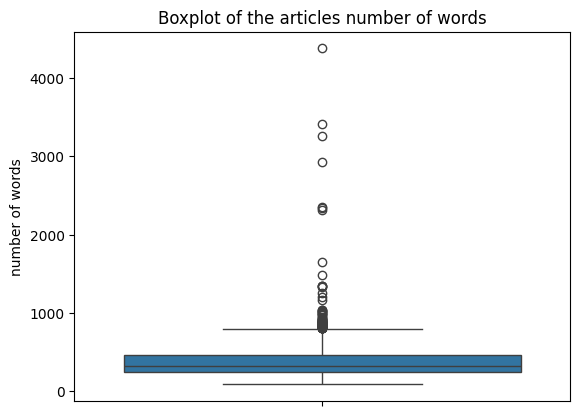

In [85]:
sns.boxplot(df["num_words_article"])
plt.ylabel("number of words")
plt.title("Boxplot of the articles number of words")

lines = plt.gca().lines[:6]
all_lines = [lines[i].get_ydata()[0] for i in range(5)]

Q1,Q3,article_lower_whisker,article_upper_whisker, Q2 = all_lines

print("Upper whisker:", article_upper_whisker)
print("Q3:", Q3)
print("Q2:", Q2)
print("Q1:", Q1)
print("Lower whisker:", article_lower_whisker)

Upper whisker: 158.0
Q3: 97.0
Q2: 74.0
Q1: 56.0
Lower whisker: 6.0


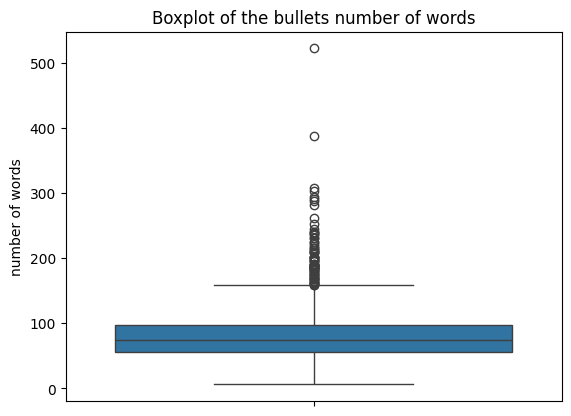

In [86]:
sns.boxplot(df["num_words_bullets"])
plt.ylabel("number of words")
plt.title("Boxplot of the bullets number of words")

lines = plt.gca().lines[:6]
all_lines = [lines[i].get_ydata()[0] for i in range(5)]

Q1,Q3,bullets_lower_whisker,bullets_upper_whisker, Q2 = all_lines

print("Upper whisker:", bullets_upper_whisker)
print("Q3:", Q3)
print("Q2:", Q2)
print("Q1:", Q1)
print("Lower whisker:", bullets_lower_whisker)

In [87]:
# removing the samples of very long sequences

new_df = df[(df['num_words_bullets'] <= bullets_upper_whisker) & (df['num_words_article'] <= article_upper_whisker)]
new_df

,path,article,bullets,num_words_article,num_words_bullets
0,business/001.txt,Ad sales boost Time Warner profit..Quarterly p...,- TimeWarner's fourth quarter sales rose 2% to...,416,77
1,business/002.txt,Dollar gains on Greenspan speech..The dollar h...,- The dollar hit its highest level against the...,381,75
2,business/003.txt,Yukos unit buyer faces loan claim..The owners ...,- Menatep Group will ask Rosneft to repay a lo...,261,107
3,business/004.txt,High fuel prices hit BA's profits..British Air...,"- BA's chief executive said the results were ""...",401,112
4,business/005.txt,Pernod takeover talk lifts Domecq..Shares in U...,- Pernod has reduced the debt it took on to fu...,262,89
...,...,...,...,...,...
2215,tech/392.txt,Broadband fuels online expression..Fast web ac...,- More than five million households in the UK ...,331,87
2216,tech/393.txt,Savvy searchers fail to spot ads..Internet sea...,- Almost 50% of those questioned said they wou...,496,110
2220,tech/397.txt,BT program to beat dialler scams..BT is introd...,- BT is introducing two initiatives to help be...,416,142
2221,tech/398.txt,Spam e-mails tempt net shoppers..Computer user...,- A third of them read unsolicited junk e-mail...,352,116


In [88]:
# preparing the data by training 0.03% of the dataset

# deleting some columns and shuffling the rows

# TODO - not sure if this is working with the drop as expected

new_df.drop(columns=["num_words_article","num_words_bullets","path"])
new_df = new_df.sample(frac = 0.03)
new_df.reset_index(drop=True, inplace=False)

,path,article,bullets,num_words_article,num_words_bullets
0,tech/205.txt,UK broadband gets speed injection..Broadband's...,- An eight megabit service has been launched b...,377,107
1,business/030.txt,Soaring oil 'hits world economy'..The soaring ...,"- US growth would reach 4.4% in 2004, but fall...",411,92
2,business/215.txt,SEC to rethink post-Enron rules..The US stock ...,- The Act also applies to firms with more than...,512,86
3,politics/100.txt,Guantanamo man 'suing government'..A British t...,- Mr. Mubanga was interrogated by a British ma...,610,109
4,entertainment/092.txt,Actor Foxx sees Globe nominations..US actor Ja...,- Jamie Foxx has two Golden Globe nominations....,141,54
...,...,...,...,...,...
58,business/201.txt,Novartis hits acquisition trail..Swiss drugmak...,- Novartis has announced 5.65bn euros ($7.4bn;...,275,60
59,entertainment/047.txt,Berlin applauds Hotel Rwanda..Political thrill...,- Cheadle was joined on stage at Berlin by Pau...,230,85
60,sport/487.txt,Officials respond in court row..Australian ten...,"- Hewitt said he had had a ""gutful"" of trying ...",211,51
61,sport/078.txt,Butler strikes gold in Spain..Britain's Kathy ...,- Gelete Burka then crowned a great day for Et...,168,56


In [89]:
# splitting the data into train and test

ratio = 0.8
split = int(len(new_df)*ratio)

train_df = new_df.iloc[:split]
test_df = new_df.iloc[split:]

In [90]:
# convert the DataFrame into DatasetDict

train_dataset = Dataset.from_dict(train_df)
test_dataset = Dataset.from_dict(test_df)
dataset = datasets.DatasetDict({"train":train_dataset,"test":test_dataset})
dataset

DatasetDict({
    train: Dataset({
        features: ['path', 'article', 'bullets', 'num_words_article', 'num_words_bullets'],
        num_rows: 50
    })
    test: Dataset({
        features: ['path', 'article', 'bullets', 'num_words_article', 'num_words_bullets'],
        num_rows: 13
    })
})

In [91]:
max_input_length = int(article_upper_whisker)
max_target_length = int(bullets_upper_whisker)

def preprocess_function(examples):
    model_inputs = tokenizer(
        examples["article"],
        max_length=max_input_length,
        truncation=True,
    )
    labels = tokenizer(
        examples["bullets"], max_length=max_target_length, truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [92]:
# initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# define max input lengths
max_input_length = int(article_upper_whisker)
max_target_length = int(bullets_upper_whisker)

tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map: 100%|██████████| 13/13 [00:00<00:00, 902.90 examples/s]


In [93]:
# ROUGE metric for automatic summarization and machine translation software in Natural Language Processing

rouge_score = evaluate.load("rouge")

In [94]:
# example on using rouge

generated_bullets = "I absolutely loved reading the Hunger Games"
reference_bullets = "I loved reading the Hunger Games"
scores = rouge_score.compute(predictions=[generated_bullets], references=[reference_bullets])
scores

{'rouge1': np.float64(0.923076923076923),
 'rouge2': np.float64(0.7272727272727272),
 'rougeL': np.float64(0.923076923076923),
 'rougeLsum': np.float64(0.923076923076923)}

In [95]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Decode generated bullets into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

    # Decode reference bullets into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # ROUGE expects a newline after each sentence
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]

    # Compute ROUGE scores
    result = rouge_score.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    return {k: round(v, 4) for k, v in result.items()}

In [96]:
# generate summaries
summarizer = pipeline("summarization", model=model_ckpt)

def print_bullets(idx):
    article = dataset["test"][idx]["article"]
    bullets = dataset["test"][idx]["bullets"]
    g_bullets = summarizer(dataset["test"][idx]["article"])[0]["summary_text"]
    score = rouge_score.compute(predictions=[g_bullets], references=[bullets])
    scores = {k: round(v, 4) for k, v in score.items()}
    print(f"'>>> Article: {article}'")
    print(f"\n'>>> Bullets: {bullets}'")
    print(f"\n'>>> Generated Bullets: {g_bullets}'")
    print(f"\n'>>> ROUGE Score: {scores}'")


print_bullets(5)

Device set to use cuda:0


'>>> Article: Angels 'favourite funeral song'..Angels by Robbie Williams is the song Britons would most like played at their funeral, a survey has suggested...While the melancholy hit topped the UK poll, Europeans favoured Queen's more upbeat anthem The Show Must Go On as their first choice. Frank Sinatra's My Way was second in the UK vote with Monty Python's Always Look on the Bright Side of Life in third place. More than 45,000 people were surveyed by digital TV station Music Choice...The European chart, which included Denmark, France and Germany, put Led Zeppelin's Stairway to Heaven in second and AC/DC's Highway to Hell in third. Queen's Who Wants to Live Forever was highly favoured by both UK and European voters...Both lists featured only one traditional or classic song each, with Britons requesting the Royal Scots Dragoon Guards' Amazing Grace and their continental counterparts opting for Mozart's Requiem. "Wanting to share your most treasured musical gem with those you're leavin

In [97]:
# fine tuning BART model

# creating data_collator
# A data_collator is a function that takes a batch of data and collates it into a format suitable for model training

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [98]:
# removing the columns with strings because the collator won’t know how to pad these elements

tokenized_datasets = tokenized_datasets.remove_columns(dataset["train"].column_names)

In [99]:
batch_size = 8
num_train_epochs = 8
# Show the training loss with every epoch
logging_steps = len(tokenized_datasets["train"]) // batch_size
model_name = model_ckpt


args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned-BBC",
    evaluation_strategy="epoch",
    learning_rate=5.6e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=num_train_epochs,
    predict_with_generate=True,
    logging_steps=logging_steps,
    push_to_hub=True,
    run_name="text_summmarizer_bullets",
    report_to="wandb", # ensures WandB logging is enabled
    hub_token=huggingface_token,
    )

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [100]:
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,)

In [101]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,No log,1.368116,0.176800,0.093100,0.145800,0.163900
2,No log,1.123620,0.171600,0.094600,0.146100,0.161300
3,1.975200,0.972527,0.203100,0.131300,0.185400,0.198200
4,1.975200,0.870577,0.203900,0.140200,0.195700,0.201200
5,1.975200,0.812383,0.207800,0.146000,0.199800,0.205700
6,1.116200,0.768882,0.220900,0.156500,0.209000,0.218100
7,1.116200,0.746506,0.220900,0.156500,0.209000,0.218100
8,1.116200,0.737305,0.220900,0.156500,0.209000,0.218100


TrainOutput(global_step=16, training_loss=1.3843953609466553, metrics={'train_runtime': 30.5222, 'train_samples_per_second': 13.105, 'train_steps_per_second': 0.524, 'total_flos': 167913322536960.0, 'train_loss': 1.3843953609466553, 'epoch': 8.0})

In [116]:
input_text = """
The Amazon rainforest is often referred to as the "lungs of the Earth" because of its critical role in producing oxygen and absorbing carbon dioxide. It spans across several countries in South America, including Brazil, Peru, and Colombia, and is home to an incredibly diverse array of wildlife, plants, and indigenous cultures. Unfortunately, the Amazon is facing significant threats due to deforestation, illegal logging, mining, and agricultural expansion. These activities are rapidly destroying large portions of the rainforest, which not only contributes to the loss of biodiversity but also accelerates climate change by releasing stored carbon into the atmosphere.

In recent years, global efforts to protect the Amazon have intensified, with governments, NGOs, and international organizations working together to implement conservation strategies and policies. One such initiative is the creation of protected areas and indigenous territories that restrict harmful activities. However, enforcement of these measures remains a challenge, particularly in remote regions where illegal activities are rampant.

Another important issue is the role of indigenous peoples in protecting the forest. Many indigenous communities have lived in the Amazon for centuries and possess a deep understanding of the ecosystem. These communities are often the first line of defense against environmental destruction and have been leading efforts to preserve their land and culture. Yet, they face increasing threats from outside forces seeking to exploit the land for economic gain.

Climate change is exacerbating the situation, with rising temperatures and altered rainfall patterns putting additional pressure on the Amazon. Scientists have warned that if current trends continue, the rainforest could reach a tipping point where it can no longer function as a carbon sink, further accelerating global warming. Given its global significance, the fate of the Amazon is a pressing issue that requires urgent and coordinated action on a global scale.
"""

# Tokenize input text
inputs = tokenizer(input_text, return_tensors="pt", max_length=2048, truncation=True).to(device)

# Generate summary
summary_ids = model.generate(
    inputs['input_ids'],
    num_beams=8,
    max_length=150,
    min_length=50,
    early_stopping=True,
    length_penalty=1.5,
    no_repeat_ngram_size=3,
    diversity_penalty=1.0,  # Encourages more diverse outputs
    num_beam_groups=4,  # Splits beams into groups that generate diverse candidates
    top_p=0.9,
)


# Decode the summary
bullets = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Post-process to format the summary in bullet points
# Split the summary into sentences by splitting on '.'
sentences = [sentence.strip() for bullet in bullets.split("-") for sentence in bullet.split(".") if sentence.strip()]

# Remove any extra spaces, empty sentences, or non-english characters
sentences = ["\n - " + sentence.strip() for sentence in sentences if sentence.encode('ascii', errors='ignore').decode().strip()]

# Join sentences with bullet points
# formatted_summary = "".join(sentences)
formatted_summary = ""
for sen in sentences:
    formatted_summary = formatted_summary + sen

# Print the formatted summary
print("Summary in Bullet Points:", formatted_summary)

Summary in Bullet Points: 
 - The Amazon rainforest is often referred to as the "lungs of the Earth" because of its critical role in producing oxygen and absorbing carbon dioxide
 - It spans across several countries in South America, including Brazil, Peru, and Colombia, and is home to an incredibly diverse array of wildlife, plants, and indigenous cultures
 - Unfortunately, the Amazon is facing significant threats due to deforestation, illegal logging, mining, and agricultural expansion
 - These activities are rapidly destroying large portions of the rainforest, which not only contributes to the loss of biodiversity but also accelerates climate change by releasing stored carbon into the atmosphere
 - The fate of the Amazon has intensified, with governments, NGOs, and international organizations working together to implement conservation strategies and policies


In [103]:
import fitz

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = "\n".join(page.get_text() for page in doc)
    return text